<a href="https://colab.research.google.com/github/joao-pires/data_science/blob/master/COVID_19_Brasil_e_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise COVID-19

Em dezembro de 2019 houve uma transmissão de um novo coronavírus (SARS-CoV-2), o qual foi identificado em Wuhan na China e causou o COVID-19, sendo em seguida disseminada e transmitida de pessoa a pessoa. 

A transmissão acontece de uma pessoa doente para outra geralmente por gotículas de saliva. 

Os sistomas da doença podem variar de um resfriado, a uma Síndrome Gripal-SG (presença de um quadro respiratório agudo). 

Ainda pouco se sabe a respeito do COVID-19, estudos estão sendo feitos pelo mundo todo em busca de mais conhecimentos sobre o vírus e de uma possível vacina.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/joao-pires/data_science/master/datasets/3916104.jpg"></center>

Cerca de 80% dos casos são assintomáticos ou com poucos sintomas, e aproximadamente 20% dos casos requer atendimento hospitalar por apresentarem dificuldades respiratórias. 

O objetivo deste projeto é aumentar o conhecimento situacional da COVID-19 no Brasil, através de uma análise de dados pública da doença. 

##Obtenção dos Dados

Os dados foram obtidos e são mantidos pelo [Our World in Data](https://https://ourworldindata.org/coronavirus). É atualizado diariamente e inclui dados sobre casos confirmados, mortes e testes, além de outras variáveis ​​de interesse em potencial.

### Dicionário de Variáveis

* `iso_code` - Código de países
* `Continent` - Continente da localização geográfica
* `location` - Localização geográfica
* `date` - Data da observação
* `total_cases` - Total de casos confirmados da COVID-19  
* `new_cases` - Novos casos confirmados de COVID-19 
* `total_cases_per_million` - Total de casos confirmados por 1 milhão de pessoas
* `new_cases_per_million` - Novos casos confirmados por 1 milhão de pessoas.
* `total_deaths_per_million` - Total de mortes por 1 milhão de pessoas
* `new_deaths_per_million` - Novas mortes por 1 milhão de pessoas
* `total_tests` - Total de testes 
* `new_tests` - Novos testes
* `new_tests_smoothed` - Novos testes nos ultimos 7 dias 
* `total_tests_per_thousand` - Novos testes por 1.000 pessoas
* `new_tests_per_thousand` - Novos testes por 1.000 pessoas
* `new_tests_smoothed_per_thousand` - Novos testes nos ultimos 7 dias por 1.000 pessoas
* `tests_units` - Unidades usados para relatar dados de testes
* `stringency_index` - Índice de rigidez impostas pelo governo. Como por exemplo fechamento de escolas, locais de trabalho, proibições de viagens, etc. Redimensionada para um valor de 0 a 100 (100 = Mais restrição)
* `population` - População em 2020
* `population_density` - Número de pessoas dividas por área terrestre
* `median_age` - Idade média da população
* `aged_65_older` - Proporção da população com 65 anos ou mais
* `gdp_per_capita` - PIB com paridade do poder de compra
* `extreme_poverty` - Porcentagem da população que vive em extrema pobreza, ultimo ano disponível desde 2010
* `cardiovasc_death_rate` - Taxa de mortalidade por doenças cardiovasculares em 2017 (numero anual de mortes por 100.00 pessoas)
* `diabetes_prevalence` - Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
* `female_smokers ` - Porcentagem de mulheres que fumam
* `male_smokers` - Porcentagem de homens que fumam
* `handwashing_facilities` - Porcentagem da população com instalações básicas de lavagem de mãos nas instalações
* `hospital_beds_per_thousand` - Camas de hospitais por 1.000 pessoas
* `life_expectancy` - Expectativa de vida no nascimento em 2019
###Importando os Dados

Usaremos o formato `csv`  neste projeto que pode ser baixado através deste [link](https://github.com/owid/covid-19-data/tree/master/public/data)
.

In [3]:
# instalando a biblioteca pywaffle

!pip install pywaffle

     |████████████████████████████████| 532kB 4.5MB/s 


In [4]:
# importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
# importando o dataset COVID-19 para um DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Análise Exploratória dos Dados





#### Analisando as 5 primeiras entradas

Primeiramente vamos analisar qual a cara do nosso `dataset`, analisando as 5 primeiras entradas e seus respectivos dados.


In [5]:
# Analisando as 5 primeiras entradas

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


#### Tamanho do Dataset

Prosseguindo, vamos descobrir quantas entradas e variavéis nosso `dataset` possui é importante sabermos a quantidade de dados que vamos trabalhar.  

In [6]:
# Identificar o volume de dados do Dataframe

print("Número de Entradas:\t {}".format(df.shape[0]))
print("Número de Variáveis:\t {}".format(df.shape[1]))

Número de Entradas:	 41592
Número de Variáveis:	 40


#### Nome das colunas e os tipos de variáveis

Agora vamos analisar qual o nome das colunas e os tipos das variáveis de cada uma delas.

In [7]:
# Imprimir os tipos das variáveis das colunas

df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

#### Valores ausentes

Precisamos saber logo no ínicio se há valores ausentes em nosso `Dataset` e se esse valores vão impactar no desenvolvilmento deste projeto. 

In [8]:
# Calculo da soma de valores ausentes
calc = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

# Transformando a soma em porcentagem
porc = pd.DataFrame(calc)
porc.style.format("{:.2%}")

,0
new_tests_per_thousand,67.73%
new_tests,67.73%
total_tests,66.93%
total_tests_per_thousand,66.93%
tests_per_case,66.40%
positive_rate,65.52%
new_tests_smoothed,63.67%
new_tests_smoothed_per_thousand,63.67%
tests_units,61.85%
handwashing_facilities,58.47%


Com os dados acima, podemos ver que há bastante valores ausentes no que se refere a dados de testes da COVID-19. 

#### Transformando o formato da coluna `date`

Vamos transformar a coluna `date` em formato `datetime` para trabalharmos melhor com os dados de data de observação.

In [9]:
# Transformando a coluna date no formato datetime

df.date = pd.to_datetime(df.date)


####  Países com mais casos confirmados de COVID-19

Visualizaremos agora os 5 países com mais casos confirmados e plotaremos um gráfico com os dados para visualização. 

In [50]:
df[['iso_code','total_cases']].loc[df.date == '2020-09-04'].sort_values(by="total_cases", ascending=False)[1:6]

,iso_code,total_cases
38950,USA,6150655.0
5611,BRA,4041638.0
17986,IND,3936747.0
32480,RUS,1009995.0
30250,PER,670145.0


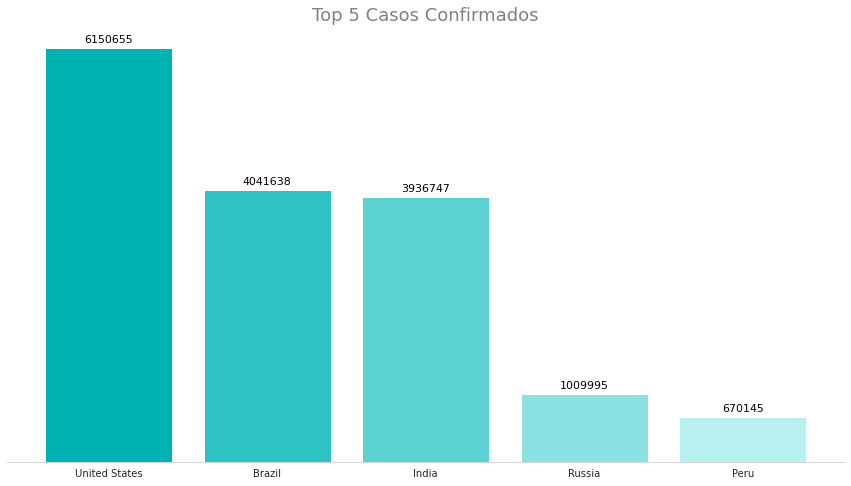

In [51]:
# Grafico de barras para total de casos
top5_total_cases = df.loc[df.date == '2020-09-04',['location','total_cases']].sort_values(by="total_cases",ascending=False)[1:6]

fig,ax = plt.subplots(figsize=(15,8))

rects = ax.bar('location','total_cases', 
                data=top5_total_cases,
                color=sns.light_palette('#00b3b3', reverse=True))


for rect in rects:
    height = rect.get_height()
    ax.annotate(
        f'{int(height)}',
        xy=(rect.get_x() + rect.get_width()/2,  height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=11,
        color="black",
        )

plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

plt.title('Top 5 Casos Confirmados',
         fontsize=18,
         color='grey'
         )
 
sns.set_style('whitegrid')
sns.despine(left=True)
plt.gca().axes.get_yaxis().set_visible(False)
plt.grid(False)
plt.show()

#### Países com mais mortes por COVID-*19*

Agora os 5 países com maior número de Mortes causado pela Covid-19. Em seguida o gráfico para visulização.

In [47]:
df[['iso_code','total_deaths']].loc[df.date == '2020-09-04'].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,total_deaths
38950,USA,186797.0
5611,BRA,124614.0
17986,IND,68472.0
25081,MEX,66329.0
13979,GBR,41527.0


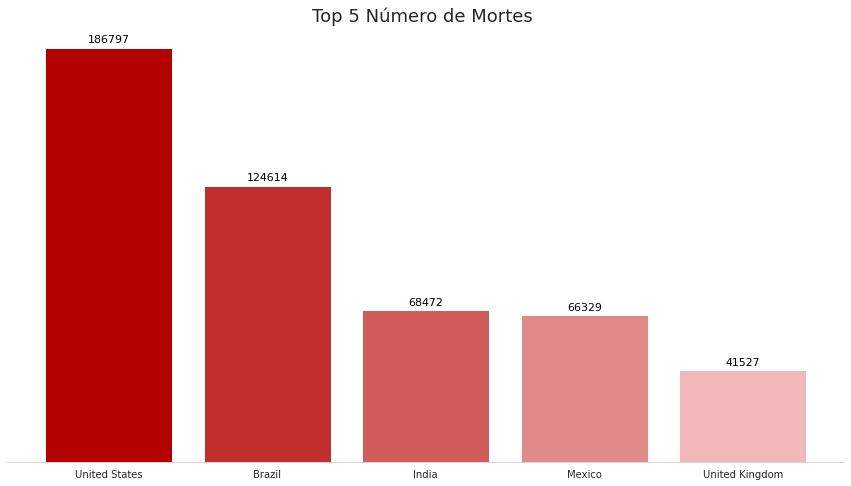

In [49]:
# Grafico de barras para total de mortes

top5_total_deaths = df.loc[df.date == '2020-09-04',
                           ['location','total_deaths']].sort_values(by="total_deaths",ascending=False)[1:6]


fig,ax = plt.subplots(figsize=(15,8))

rects = ax.bar('location','total_deaths', 
                data=top5_total_deaths,
                color=sns.light_palette('#B30000', reverse=True))


for rect in rects:
    height = rect.get_height()
    ax.annotate(
        f'{int(height)}',
        xy=(rect.get_x() + rect.get_width()/2,  height),
        xytext=(0, 3),  # offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=11,
        color="black",
        )

plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 
    
plt.title('Top 5 Número de Mortes ',
         fontsize=18,
         )

plt.gca().axes.get_yaxis().set_visible(False)
sns.set_style('whitegrid')
sns.despine(left=True)
plt.grid(False)
plt.show()



#### Evolução de Casos X Mortes

Vimos acima os países com o maior número de casos e mortes causado pela Covid-19, vamos visualizar agora em um gráfico de linhas como está a evolução desses números em todo o Mundo.

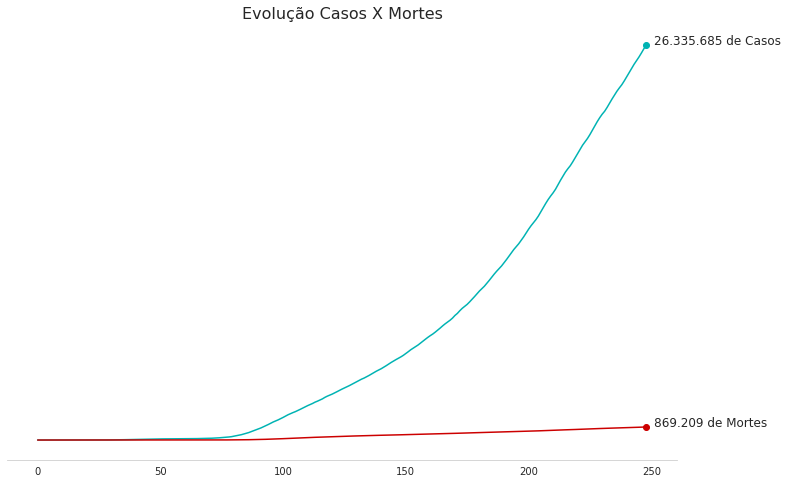

In [55]:
# Grafico de barras para total de mortes

ev_cases = df.loc[df.location == "World", "total_cases"].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(ev_cases, color='#00b3b3',marker='o',markevery=[-1])
ax.text(x = ev_cases.index.max() + 3, y = ev_cases.values.max(), s = "26.335.685 de Casos", fontsize = 12)
ax.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 


ev_deaths = df.loc[df.location == "World", "total_deaths"].reset_index(drop=True)
ax.plot(ev_deaths, color='#cc0000',marker='o',markevery=[-1])
ax.text(x = ev_deaths.index.max() + 3, y = ev_deaths.values.max(), s = "869.209 de Mortes", fontsize = 12)
ax.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 


plt.title('Evolução Casos X Mortes',
         fontsize=16,
         )


sns.set_style('whitegrid')
sns.despine(left=True)
plt.gca().axes.get_yaxis().set_visible(False)
plt.grid(False)
plt.show()


A uma enorme crescente em número de casos, e também podemos observar o quão rápido foi a transmissão do Vírus. O número de mortes é menos e evoluí de uma maneira mais lenta, porém já são quase **1 milhão** de vidas perdidas durante a pandemia. 

#### Taxa de Mortalidade

Com base nos números observados, podemos calcular a taxa de mortalidade do COVID-19.

A taxa de mortalidade do Covid-19 é de 3.30%


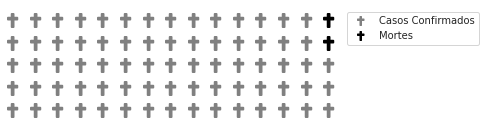

In [15]:
# Calculo da taxa de mortalidade

mortality_rate = (ev_deaths.max() / ev_cases.max())
print('A taxa de mortalidade do Covid-19 é de {:.2%}'.format(mortality_rate)) 

# Gratico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                values={"Casos Confirmados" :ev_cases.max(), "Mortes" : ev_deaths.max()},
                colors=('grey','black'),
                icons=('cross'),icon_size=15,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
fig.patch.set_alpha(0.)

plt.show();

A cada 100 pessoas infectadas, em média 3 são por mortas pelo novo Coronavírus. 

## Analise Exploratória para o Brasil

Agora vamos realizar uma análise exploratória para o nosso país, para isso vamos copiar um `dataframe` apenas para o Brasil. 

In [16]:
# Criando um dataframe para o Brasil

df_brazil = df.loc[df.location == "Brazil"].copy()

#### Registro do primeiro Caso e Morte

Vamos buscar o registro do primeiro caso e da primeira morte, e analisar o *intervalo* de tempo de um dado a outro. 



In [17]:
# Buscando a data do primeiro caso

df_brazil.date.loc[df_brazil['total_cases'] == 1].head(1)
print('O primeiro caso foi registrado em {}'.format(df_brazil.date.loc[5366]))

O primeiro caso foi registrado em 2020-01-03 00:00:00


In [18]:
# Buscando a data da primeira morte

df_brazil.date.loc[df_brazil['total_deaths'] == 1].head(1)
print('A primeira morte foi registrada em {}'.format(df_brazil.date.loc[5387]))

A primeira morte foi registrada em 2020-01-24 00:00:00


In [63]:
# Intervalo de tempo do primeiro caso e primeira morte

from datetime import date
delta = df_brazil.date.loc[5387] - df_brazil.date.loc[5366]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


#### Grafico Logaritmico

Com esses dados em mãos vamos plotar um grafico logaritmico para melhor visualização. 

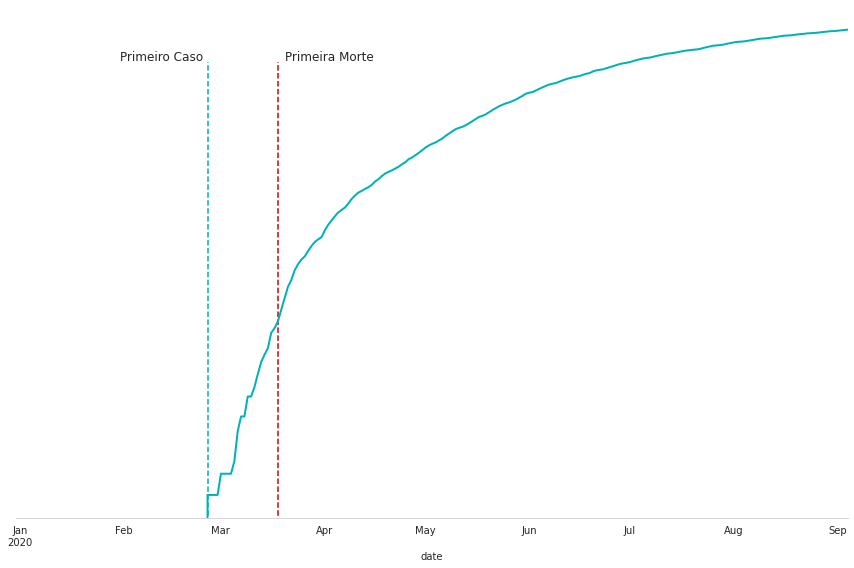

In [20]:
# Gerando o grafico logaritmico
fig, ax = plt.subplots(figsize=(12,8))
df_brazil.plot('date', 'total_cases', ax=ax, color='#00b3b3', linewidth=2, legend=False)
ax.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 


plt.vlines(x='2020-02-26', ymin=0, ymax=1400000, color='#00b3b3',linestyle='dashed')
plt.vlines(x='2020-03-18', ymin=0, ymax=1400000, color='#cc0000',linestyle='dashed')


plt.text(x='2020-01-31', y=1500000, s='Primeiro Caso',fontsize=12)
plt.text(x='2020-03-20', y=1500000, s='Primeira Morte', fontsize=12)


ax.set_yscale('log')
sns.set_style('whitegrid')
sns.despine(left=True)
plt.gca().axes.get_yaxis().set_visible(False)
plt.grid(False)
plt.tight_layout();

Podemos observar que o número de casos já estava em uma enorme crescente até o registro da primeira morte.

#### Número de mortes diárias

Para analisarmos como está a pandemia no Brasil nos últimos 15 dias, vamos gerar um gráfico com os dados de mortes diárias e traçarmos uma linha média. 

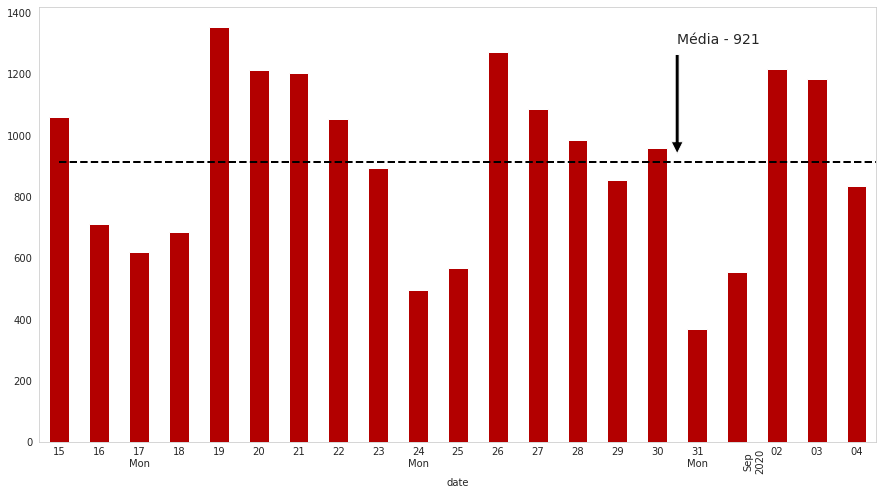

In [62]:
# Grafico com número de mortes por dia

fig, ax = plt.subplots(figsize=(15, 8))


df_brazil.loc[df['date'] >= '2020-08-15'].plot('date', 'new_deaths', ax=ax, color='#B30000', legend=False, grid=False,kind='bar')
plt.hlines(y=df_brazil.loc[df['date'] >= '2020-08-15', ['date', 'new_deaths']].mean(),
           xmin=0, xmax=df_brazil.date.max(), 
           linewidth=2,linestyles='dashed')

ax.annotate('Média - 921 ', xy =(15.5, 921), 
             xytext =(15.5, 1300),fontsize=14, 
             arrowprops = dict(facecolor ='black', 
                               shrink = 0.05)) 

major_ticks = []
major_tick_labels = []
minor_ticks = []
minor_tick_labels = []

for loc, label in zip(ax.get_xticks(), ax.get_xticklabels()):
  when = datetime.strptime(label.get_text(), '%Y-%m-%d %H:%M:%S')
  if when.day == 1:
    major_ticks.append(loc)
    major_tick_labels.append(when.strftime("\n\n\n%b\n%Y"))
  else:
    minor_ticks.append(loc)
    if when.weekday() == 0:
      minor_tick_labels.append(when.strftime("%d\n%a"))
    else:
      minor_tick_labels.append(when.strftime("%d"))


ax.set_xticks(major_ticks)
ax.set_xticklabels(major_tick_labels)
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticklabels(minor_tick_labels, minor=True)

plt.show();

Para comparamos, vamos calcular a média de mortes no mês de julho.

In [64]:
# média de mortes no mês de julho

df_brazil.loc[(df['date'] >= '2020-07-01') & (df['date'] <= '2020-07-30') ,['new_deaths']].mean()

new_deaths    1060.666667
dtype: float64

Com esses dados, podemos observar que a média de mortes vem reduzindo, porém ainda assim são 921 mortes em média por dia de vidas perdidas. 

## Conclusão

Um detalhe referente a essa análise, é que esses dados são atualizados diariamente sendo assim rapidamente esse conjunto de dados ficará desatualizado. 

Porém, através dos dados analisados, podemos destacar que: 

* Os Estados Unidos estão disparados em número de casos e de mortes. 
* A média de mortes diárias no Brasil está diminuindo.
* No mundo, casos e mortes ainda estão crescendo. 

Outras análises podem ser feitas através desse conjunto de dados, mas com essa análise inicial conseguimos extrair muitas informações.